<br>
<h1 style = "font-size:40px; font-family:monospace ; font-weight : bold; color :#AE0052; text-align: center; border-radius: 5px 25px;">MACHINE LEARNING PROJECT 2021</h1>
<br>

<br>
<h1 style = "font-size:30px; font-family:monospace ; font-weight : bold; text-align: center; border-radius: 10px 10px;">DIABETES PREDICTION </h1>
<br>

<span style="font-size:20px;color:#0026D8;font-weight : bold">Data Description: Dataset of diabetes, taken from the hospital Frankfurt, Germany</span>


  - **Pregnancies** - Number of times pregnant.
  - **Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
  - **BloodPressure**-Diastolic blood pressure (mm Hg).
  - **SkinThickness**-Triceps skinfold thickness (mm).
  - **Insulin**-2-Hour serum insulin (mu U/ml).
  - **BMI**-Body mass index (weight in kg/(height in m)^2).
  - **DiabetesPedigreeFunction**-Diabetes pedigree function.
  - **Age**- years
  - **Outcome**- Class variable (0 or 1).


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> Importing Required Libraries</h1>

In [7]:
## Import numpy, pandas

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## Import Logistic regression, Randomforest, DecisionTree and SVC

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve,plot_confusion_matrix, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [8]:
data=pd.read_csv("diabetes2.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
## Check the shape of data.
data.shape

(2000, 9)

In [10]:
outcome_truecount=len(data.loc[data['Outcome']==1])
outcome_falsecount=len(data.loc[data['Outcome']==0])

In [11]:
(outcome_truecount,outcome_falsecount)

(684, 1316)

In [12]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [13]:
target_count()
target_percent()


## Balancing the dataset

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Check missing values in the dataset and fill them by any method</h1>

In [14]:
print("total number of rows :{0}".format(len(data)))
print("number of rows missing glucose :{0}".format(len(data.loc[data['Glucose']==0 ])))
print("number of rows missing bloodpressure :{0}".format(len(data.loc[data['BloodPressure']==0 ])))
print("number of rows missing skin :{0}".format(len(data.loc[data['SkinThickness']==0 ])))
print("number of rows missing Insulin :{0}".format(len(data.loc[data['Insulin']==0 ])))
print("number of rows missing BMI :{0}".format(len(data.loc[data['BMI']==0 ])))
print("number of rows missing Pedigree :{0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0 ])))
print("number of rows missing Age :{0}".format(len(data.loc[data['Age']==0 ])))


total number of rows :2000
number of rows missing glucose :13
number of rows missing bloodpressure :90
number of rows missing skin :573
number of rows missing Insulin :956
number of rows missing BMI :28
number of rows missing Pedigree :0
number of rows missing Age :0


In [16]:
data[['Glucose','BloodPressure','BMI']] = data[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35,0,33.6,0.127,47,1
1,0,84.0,82.0,31,125,38.2,0.233,23,0
2,0,145.0,NaN,0,0,44.2,0.630,31,1
3,0,135.0,68.0,42,250,42.3,0.365,24,1
4,1,139.0,62.0,41,480,40.7,0.536,21,0


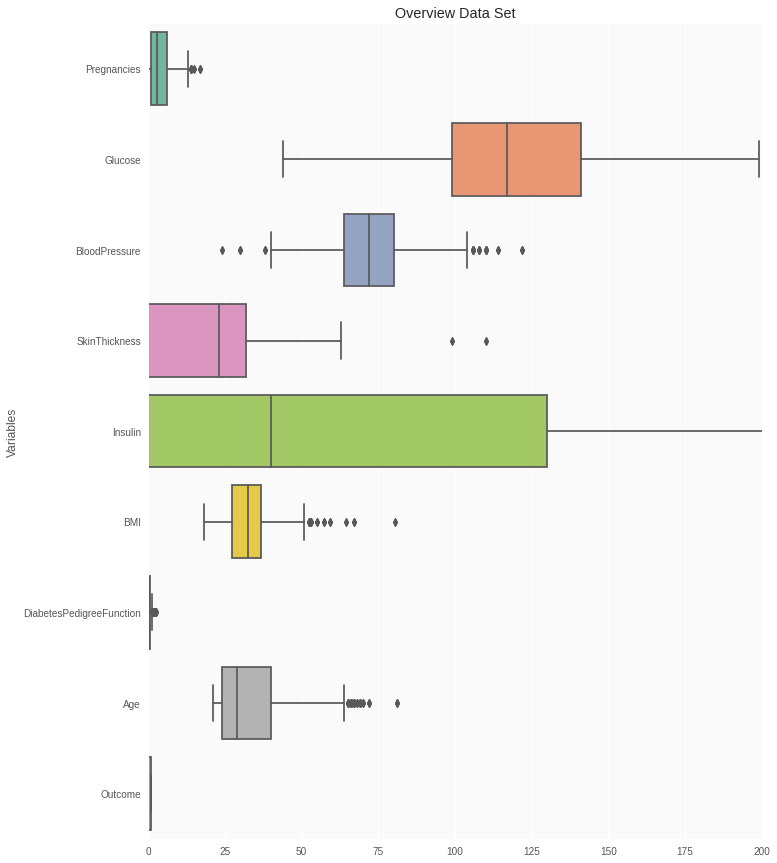

In [18]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

In [19]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                    )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)                  



In [20]:
correlation_plot()

In [21]:
#   Replace missing values and EDA(median)

def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [22]:
# insulin 
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')


In [23]:
# glucose 

plot_distribution('Glucose', 0)

In [24]:

median_target('Glucose')


,Outcome,Glucose
0,0,107.0
1,1,141.0


In [25]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 141

In [26]:
# blood pressure 

plot_distribution('BloodPressure', 5)

In [27]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,75.0


In [28]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [29]:
#BMI

plot_distribution('BMI', 0)

In [30]:
median_target('BMI')

,Outcome,BMI
0,0,30.4
1,1,34.3


In [31]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.4
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

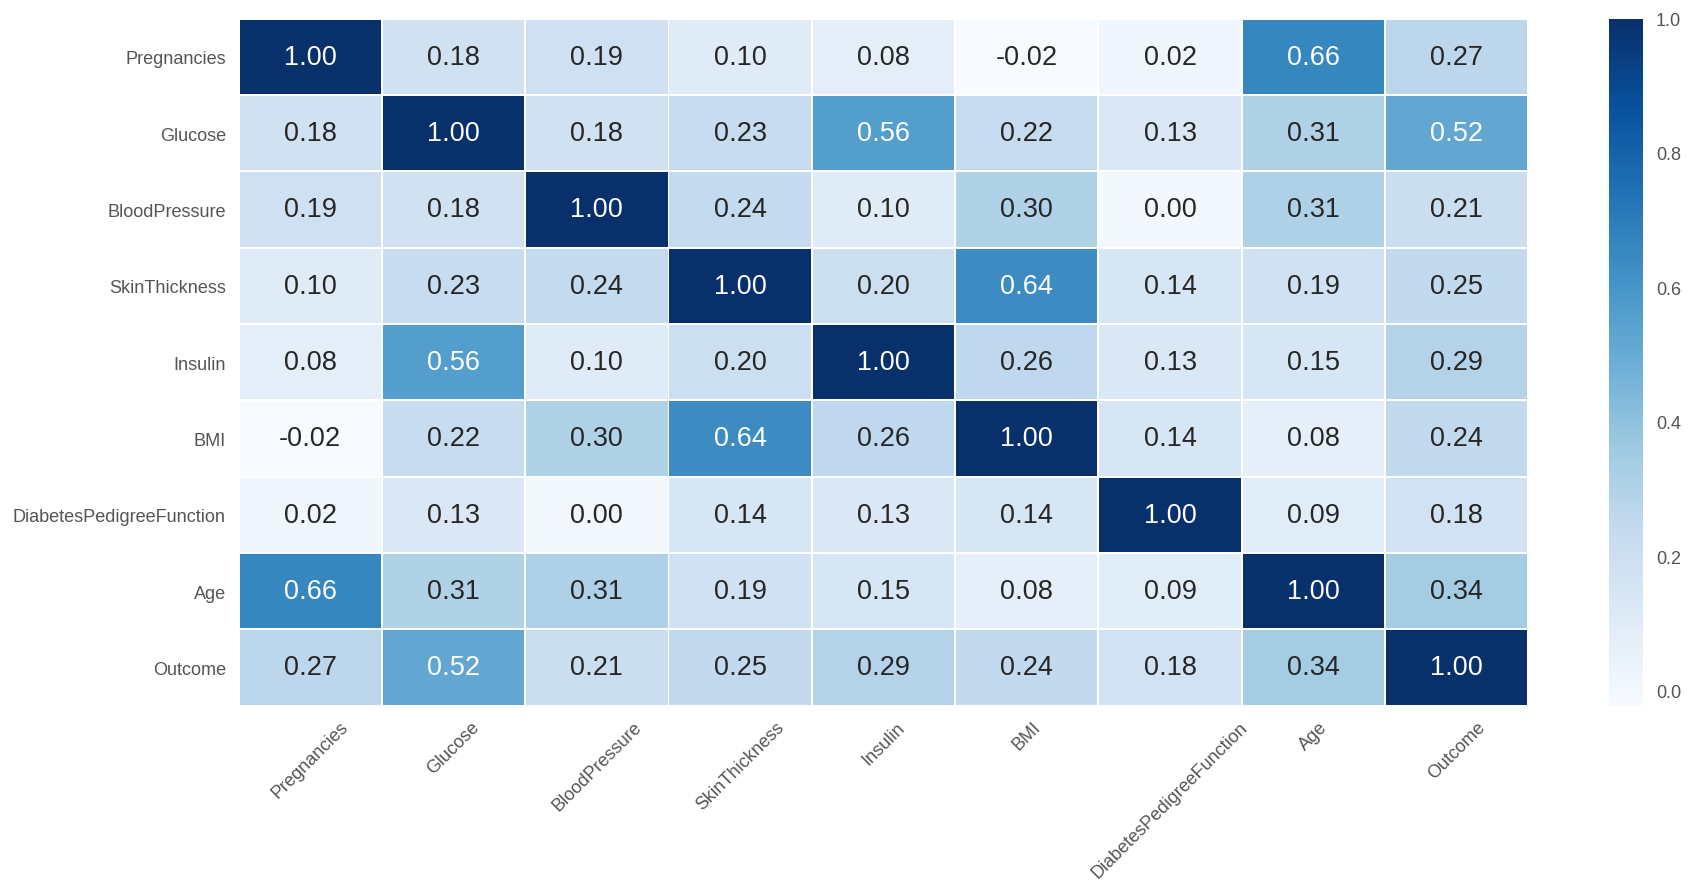

In [32]:
## Plotting Correlation matrix with Non-null Values:

df_non_null = data[(data["Insulin"] != 0) & (data["SkinThickness"] != 0)]     ## filtering rows with 0 values 

## plotting correlation matrix:

corr_matrix_non_null = df_non_null.corr()
plt.figure(figsize=(16,7),dpi=130)
sns.heatmap(corr_matrix_non_null,
           annot=True, annot_kws={'size': 15},
           linewidths = 0.5,
           fmt=".2f", cmap = "Blues")
plt.xticks(rotation = 45);

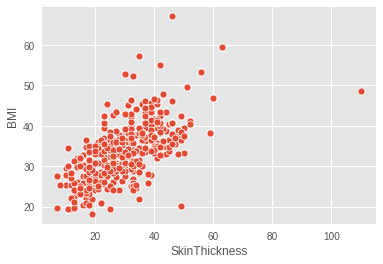

In [33]:
sns.scatterplot(data=df_non_null, x = "SkinThickness", y = "BMI");

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
## filling missing values for SkinThickness based on BMI values:

## defining x and y and converting them in numpy arrays:
x = np.array(df_non_null["BMI"])
y = np.array(df_non_null["SkinThickness"])

## such reshaping is compulsory before fitting when we have only 1 feature:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

lr.fit(x,y)

LinearRegression()

In [39]:

## This will fill all missing(0 values) for SkinThickness. 
## uncomment print statement to see outputs:

for index,bmi_value in enumerate(data["BMI"]):
    if data["SkinThickness"][index] == 0:
        bmi_value = np.array(bmi_value)
        bmi_value = bmi_value.reshape(-1,1)
        st_pred = lr.predict(bmi_value)
        st_pred = st_pred.reshape(-1)
        st_pred = st_pred.item()
        #print(bmi_value,st_pred,type(st_pred),data["SkinThickness"][index])
        
        data.at[index,"SkinThickness"] = st_pred    



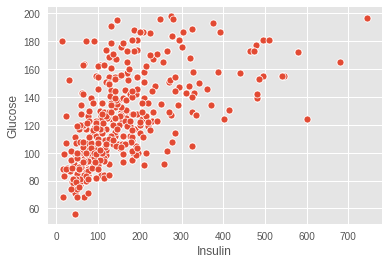

In [40]:

sns.scatterplot(df_non_null.Insulin,df_non_null.Glucose);



In [41]:
## Repeating same thing for Glucose and Insulin:

df_insulin = df_non_null[df_non_null["Insulin"] < 400]  ## filtered high values of Insulin to get better fit line

X = np.array(df_insulin.Glucose)
Y = np.array(df_insulin.Insulin)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

lr.fit(X,Y)

LinearRegression()

In [42]:
for index,glucose_value in enumerate(data["Glucose"]):
    if data["Insulin"][index] == 0:
        glucose_value = np.array(glucose_value)
        glucose_value = glucose_value.reshape(-1,1)
        Insu_pred = lr.predict(glucose_value)
        Insu_pred = Insu_pred.reshape(-1)
        Insu_pred = Insu_pred.item()
        ##print(bmi_value,st_pred,type(st_pred),df["SkinThickness"][index])
        
        data.at[index,"Insulin"] = st_pred   

In [43]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

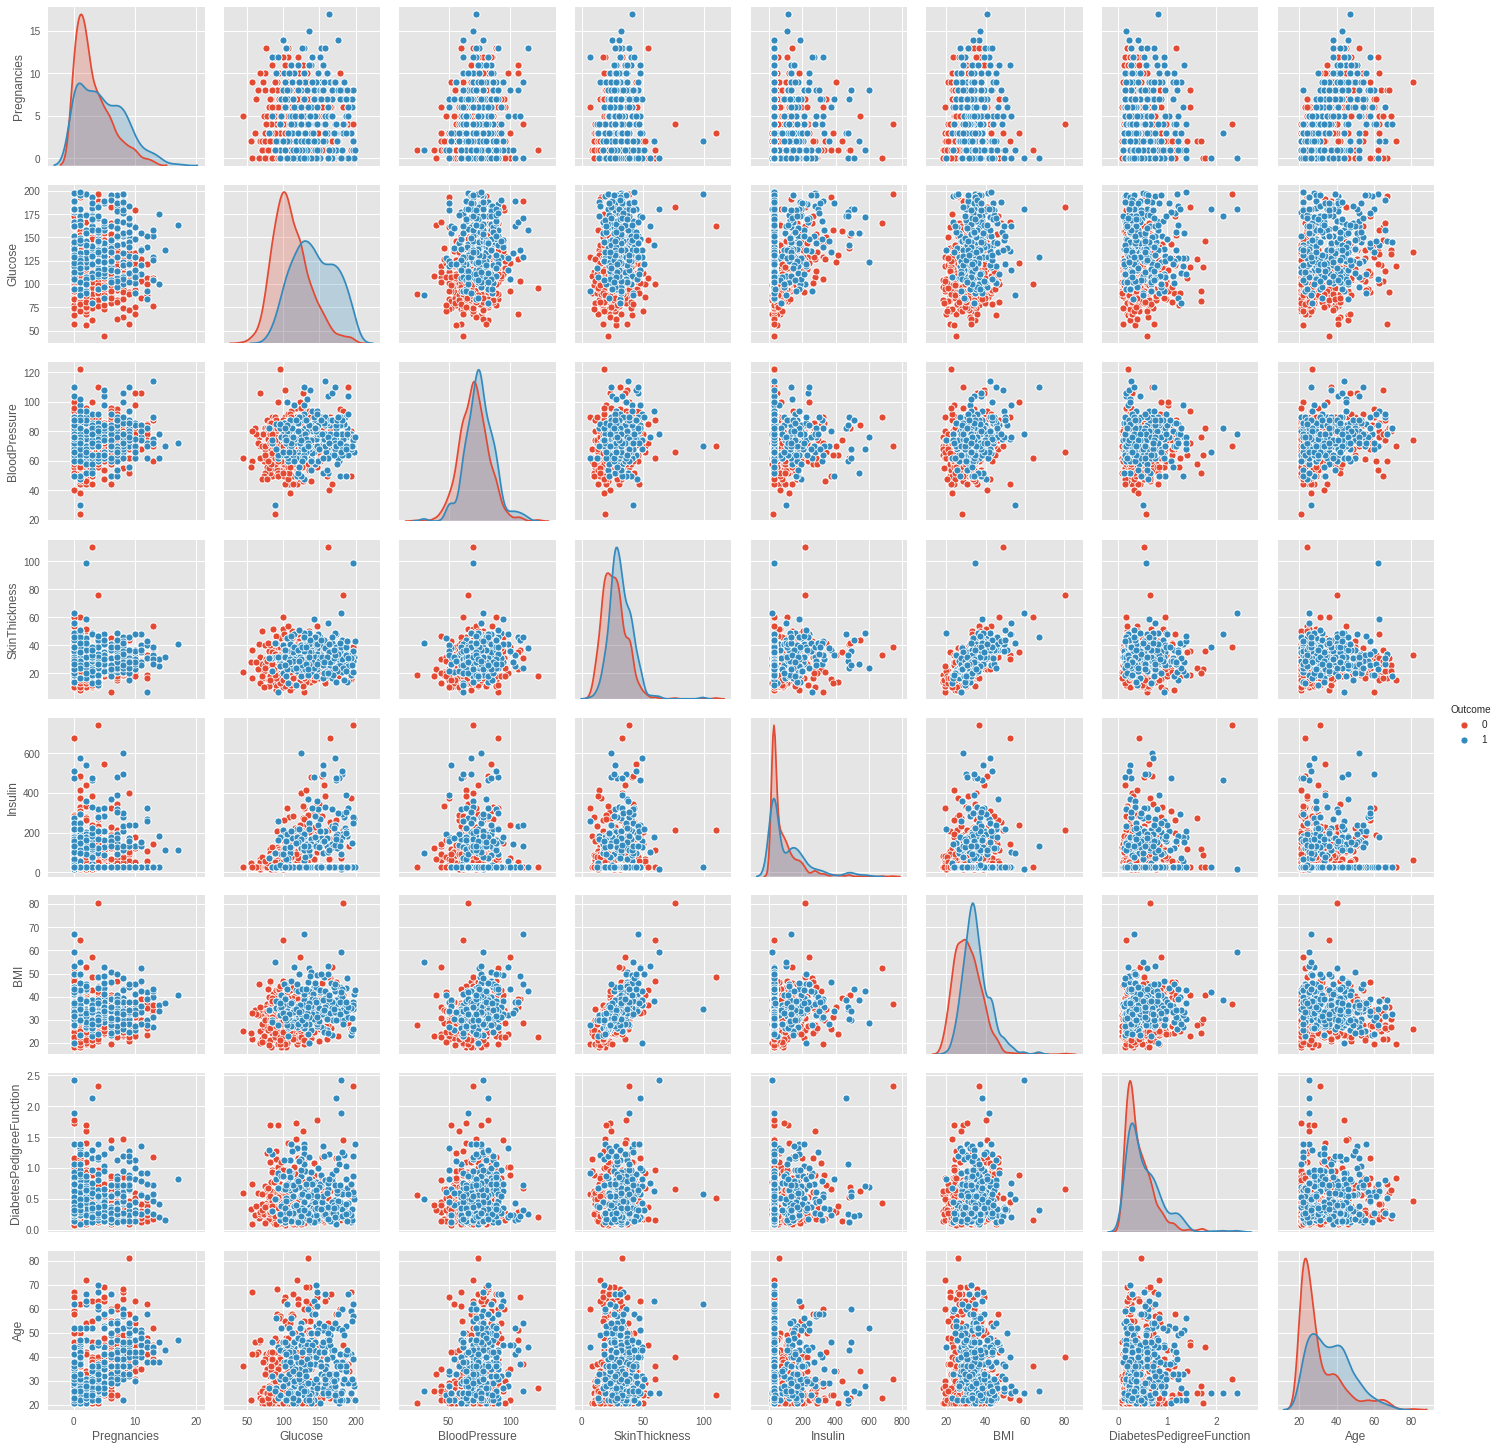

In [44]:
p=sns.pairplot(data, hue = 'Outcome')

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scaling the data</h1>

In [46]:
from sklearn import preprocessing
# separate the data from the target attributes
X = data.drop(["Outcome"],axis = 1)
y = data.Outcome
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Splitting Dataset Into Training & Validation Set</h1>

In [47]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [48]:
X_train.shape

(1333, 8)

In [49]:
X_val.shape

(667, 8)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> Algorithms</h1>

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 1.Decision Tree </h1>

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state=10)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [52]:
val_predictions = model_1.predict(X_val)
from sklearn.metrics import accuracy_score
score_model1 =accuracy_score(y_val,val_predictions)
print(score_model1)


0.9625187406296851


In [53]:
from sklearn.metrics import classification_report
report_model1=classification_report(y_val,val_predictions)
print(report_model1)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       439
           1       0.95      0.94      0.94       228

    accuracy                           0.96       667
   macro avg       0.96      0.96      0.96       667
weighted avg       0.96      0.96      0.96       667



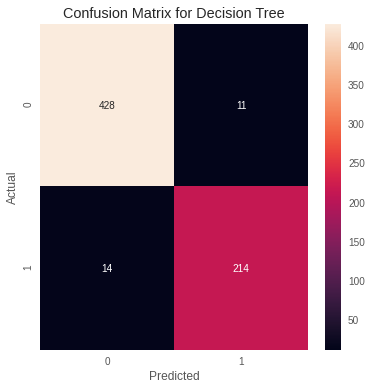

In [54]:
from sklearn.metrics import confusion_matrix
conf_mat1=confusion_matrix(y_val,val_predictions)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 2.Random Forest</h1>

In [55]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=10)
model_2.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [56]:
val_predictions_1 = model_2.predict(X_val)
score_model2 =accuracy_score(y_val,val_predictions_1)
print(score_model2)

0.9730134932533733


In [57]:
report_model2=classification_report(y_val,val_predictions_1)
print(report_model2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.98      0.94      0.96       228

    accuracy                           0.97       667
   macro avg       0.97      0.97      0.97       667
weighted avg       0.97      0.97      0.97       667



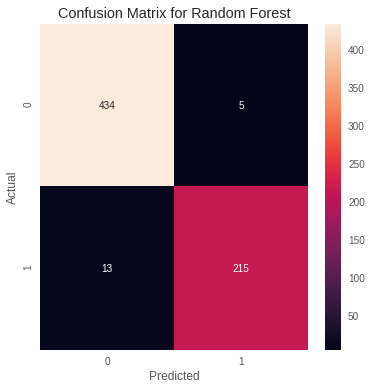

In [58]:
conf_mat2=confusion_matrix(y_val,val_predictions_1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 3.Logistic Regression</h1>

In [59]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state=10)
model_3.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [60]:
val_predictions_2 = model_3.predict(X_val)
score_model3 =accuracy_score(y_val,val_predictions_2)
print(score_model3)

0.7961019490254873


In [61]:
report_model3=classification_report(y_val,val_predictions_2)
print(report_model3)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       439
           1       0.74      0.62      0.68       228

    accuracy                           0.80       667
   macro avg       0.78      0.75      0.76       667
weighted avg       0.79      0.80      0.79       667



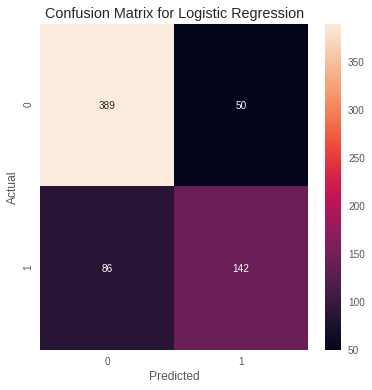

In [63]:
conf_mat3=confusion_matrix(y_val,val_predictions_2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 4.SVM </h1>

In [64]:
from sklearn.svm import SVC
model_4 = SVC(random_state=10)
model_4.fit(X_train,y_train)

SVC(random_state=10)

In [65]:
val_predictions_3 = model_4.predict(X_val)
score_model4 =accuracy_score(y_val,val_predictions_3)
print(score_model4)

0.7856071964017991


In [66]:
report_model4=classification_report(y_val,val_predictions_3)
print(report_model4)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       439
           1       0.77      0.54      0.63       228

    accuracy                           0.79       667
   macro avg       0.78      0.73      0.74       667
weighted avg       0.78      0.79      0.77       667



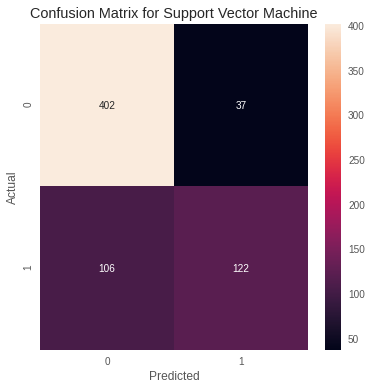

In [67]:
conf_mat4=confusion_matrix(y_val,val_predictions_3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

Text(0, 0.5, 'Algorithm Scores')

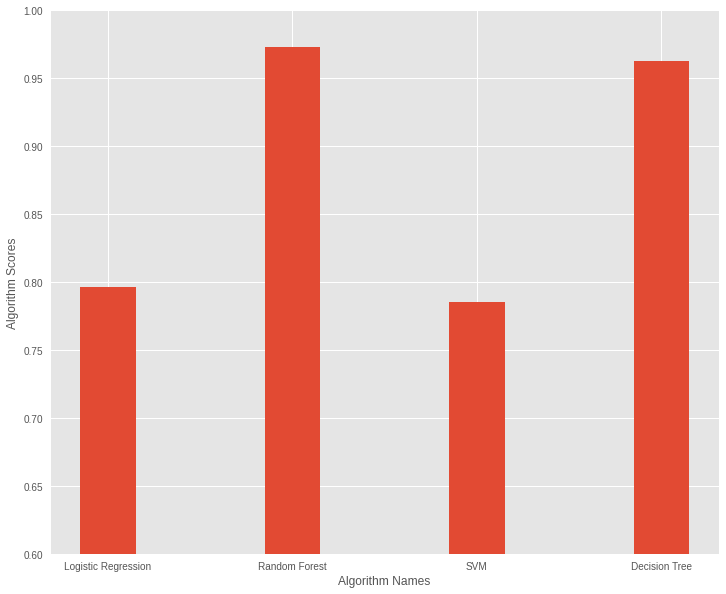

In [68]:
# Comparison Graph for used algorithms 
algo_names=['Logistic Regression','Random Forest','SVM','Decision Tree']
algo_scores=(score_model3,score_model2,score_model4,score_model1)
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names,algo_scores,width=0.3)
plt.xlabel('Algorithm Names')
plt.ylabel('Algorithm Scores')

<br>
<h1 style = "font-size:25px; font-family:monospace ; font-weight : bold; text-align: center; border-radius: 10px 10px;">Therefore,Random Forest performed well with 97% accuracy. </h1>
<br>